In [1]:
import os
import os.path
from subprocess import Popen, PIPE
import numpy as np
import pandas as pd
import time
import matplotlib as plt


In [2]:
def reversed_complement(sequence):
    mapping = {'A': 'U', 'G': 'C', 'U': 'A', 'C': 'G'}
    sequence_upper = sequence.upper()

    complement = ''
    for c in sequence_upper:
        complement += mapping[c]

    # reverse the sequence
    return complement[::-1]

In [3]:
#Read results
a=pd.read_csv("Serie_B_good.csv")
#a["Sensor"]=ind
a

,Sensor,On/Off Rate,Sensor Sequence,Trigger Sequence,Amplification sequence
0,25,6.186667,UCUUCAGCCUCCAUGUGUCAUUCUUCUCACUCUCAAGGACUUUAGA...,UUGAGAGUGAGAAGAAUGACACAUGGAGGCUGAAGA,GGGCAGUGAUCUAGGCUACUGGAUUGAGAGUGAGAAGAAUGACACA...
1,26,11.093333,AAAUUCCCCUUGUUUCUUUUCUCUUUUUCCCAUCAUGGACUUUAGA...,AUGAUGGGAAAAAGAGAAAAGAAACAAGGGGAAUUU,GGGUGCCAGAGUUGUGUGUACAACAUGAUGGGAAAAAGAGAAAAGA...
2,27,34.133333,UUUCGCUCUAUUCUCAUCAGUUUCAUGUCCUGUGUCGGACUUUAGA...,GACACAGGACAUGAAACUGAUGAGAAUAGAGCGAAA,GGGCCAGCACAGUGGGAUGAUCGUUAAUGACACAGGACAUGAAACU...
3,28,7.360000,GCUCCCCUUCUACUGAUCUCCACAUGAUGUUUUCCAGGACUUUAGA...,UGGAAAACAUCAUGUGGAGAUCAGUAGAAGGGGAGC,GGGCGGGAUCUCCUCUGUUUCAAGAAUGGAAAACAUCAUGUGGAGA...
4,28,2.986667,AACUUCUUUAUUAUUUCCAUAGCCUCUUUUUUCCCCGGACUUUAGA...,GGGGAAAAAAGAGGCUAUGGAAAUAAUAAAGAAGUU,GGGCCAUCACUGGGUCUCAUCAAUAGAUGGGGUUCAGUGGGGAAAA...
5,29,2.666667,AGGGUGGCUUCGGCUCUUGGUGAAUUGGGCGUUAUCGGACUUUAGA...,GAUAACGCCCAAUUCACCAAGAGCCGAAGCCACCCU,GGGAAUGCUGUCAGUUCAUGGCUCCCAGCACAGUGGGAUGAUCGUU...
6,30,0.746667,CUUCCACUGCAGUCUUCCACUCUUUUUCCUCUUCAAGGACUUUAGA...,UUGAAGAGGAAAAAGAGUGGAAGACUGCAGUGGAAG,GGGAGAAGGAUGGUCUCUUCCUGGUUGUGGAAAGAGCUAGGCAAAC...
7,31,19.093333,CUGGGAUCAAGUACAUGUAGUGCGCCACGAGCAAAAGGACUUUAGA...,UUUUGCUCGUGGCGCACUACAUGUACUUGAUCCCAG,GGGCUGACCCUAAUAGUGGCCAUCAUUUUGCUCGUGGCGCACUACA...
8,32,28.800000,ACUAUUAGGGUCAGGGGUGUUAAUUGUGAGUAGCAAGGACUUUAGA...,UUGCUACUCACAAUUAACACCCCUGACCCUAAUAGU,GGGUUUGGUAUGGGCAAAGGGAUGCCAUUCUACGCAUGGGACUUUG...
9,33,3.626667,CAUCGCCAUUAAGGAGUAGUUGUUGUAUGAGGUGGUGGACUUUAGA...,ACCACCUCAUACAACAACUACUCCUUAAUGGCGAUG,GGGCCAUCUAUGCUGCCUUGACAACUUUCAUUACCCCAGCCGUCCA...


In [4]:
def split_sequence(sequence, window):
    sequences = []
    limit = len(sequence) - window + 1

    for i in range(0, limit):
        sequences.append(sequence[i:window + i])

    return sequences

In [5]:
# Calculation of DG of any sequence
def DG(sequence,result_path,wait):
    file = open('{}pipo.in'.format(result_path), 'w')
    file.write("{}\n".format(sequence))
    file.close()
    final=[]
    semi_final=[]

    Popen(["mfe -T 23 {}pipo".format(result_path)],shell=True, stdout=PIPE)
    time.sleep(wait)
    lenght=len(sequence)
    with open("{}pipo.mfe".format(result_path)) as res:
        for r in res:
            r = r.strip('\n')
            if not r.startswith('%'):
                r = r.split('\t')
                semi_final.append(r)

    #final.append()                

    return (float(semi_final[2][0]))

    os.remove("{}pipo.mfe".format(result_path,))
    os.remove("{}pipo.in".format(result_path))


In [6]:
Dg_Switch=[]
for i in range(len(a.iloc[:,2])):
    Dg_Switch.append(DG(a.iloc[i,2],"",1))
P1=pd.Series(Dg_Switch)

In [7]:
Dg_trigger=[]
for i in range(len(a.iloc[:,3])):
    Dg_trigger.append(DG(a.iloc[i,3],"",1))
P2=pd.Series(Dg_trigger)

In [8]:
#Incorporating this parameters as columns in the result DataFrame
a["DeltaG_Switch"]=P1.values
a["DeltaG_Trigger"]=P2.values

In [9]:
#a.iloc[0::,1::]
sensor_index=[]
for i in a.Sensor:
    sensor_index.append(str("Sensor ") + str(i) + str("B"))
sensor_index
ind=pd.Series(sensor_index)

In [10]:
# Calculation of DG of the mfe a complex 
def DG_2(sequence1, sequence2, result_path,wait):
    
    
    file = open("{}Pipe.in".format(result_path), 'w')
    file.write("{}\n".format("2"))
    file.write("{}\n".format(sequence1))
    file.write("{}\n".format(sequence2))
    file.write("{}\n".format("1 2"))
    file.close()

    semi_final=[]
    Popen(["mfe -multi {}Pipe".format(result_path)],shell=True, stdout=PIPE)
    time.sleep(wait)
    #lenght=len(sequence)
    with open("{}Pipe.mfe".format(result_path)) as res:
        for r in res:
            r = r.strip('\n')
            if not r.startswith('%'):
                r = r.split('\t')
                semi_final.append(r)
    os.remove("{}Pipe.in".format(result_path))
    os.remove("{}Pipe.mfe".format(result_path))            
    return (float(semi_final[2][0]))

In [11]:
def parse_pairs_result(res, length):
    final = []
    for r in res:
        r = r.strip('\n')
        if not r.startswith('%'):
            r = r.split('\t')
            if len(r) == 3:
                if r[1] == str(length+1):
                    final.append(float(r[2]))

    return final

In [12]:

def norm_single_streadness(sequence, result_path, wait=1):
    file = open('{}pipo.in'.format(result_path), 'w')
    file.write("{}\n".format(sequence))
    file.close()

    Popen(["pairs", "{}pipo".format(result_path)], stdout=PIPE)
    time.sleep(wait)
    with open("{}pipo.ppairs".format(result_path)) as res:
        parsed_res = parse_pairs_result(res, len(sequence))

    os.remove("{}pipo.ppairs".format(result_path,))
    os.remove("{}pipo.in".format(result_path))
    sin=parsed_res
    
    single=(np.sum(sin)/len(sin))


    return single

In [13]:

def all_single_streadness(sequence, result_path, wait=1):
    file = open('{}pipo.in'.format(result_path), 'w')
    file.write("{}\n".format(sequence))
    file.close()

    Popen(["pairs", "{}pipo".format(result_path)], stdout=PIPE)
    time.sleep(wait)
    with open("{}pipo.ppairs".format(result_path)) as res:
        parsed_res = parse_pairs_result(res, len(sequence))

    os.remove("{}pipo.ppairs".format(result_path,))
    os.remove("{}pipo.in".format(result_path))
    sin=parsed_res
    


    return sin

In [14]:
len(a.iloc[0,3])

36

In [50]:
SS_Trigger=[]
for i in range(len(a.iloc[:,3])):
    SS_Trigger.append(norm_single_streadness(a.iloc[i,3],"",2))
P3=pd.Series(SS_Trigger)
a["Single_Streadness_Trigger"]=P3.values

In [16]:
Dg_Complex=[]
for i in range(len(a.iloc[:,3])):
    Dg_Complex.append(DG_2(a.iloc[i,2],a.iloc[i,3],"",2))
P4=pd.Series(Dg_Complex)
a["DeltaG_Complex"]=P4.values

In [17]:
a.iloc[11,4][101:(101+len(a.iloc[11,3]))]

'AGACAGAGUUCCAGAAAACAAAACAUCAAGAGUGGG'

In [18]:
a.iloc[:,2]

0     UCUUCAGCCUCCAUGUGUCAUUCUUCUCACUCUCAAGGACUUUAGA...
1     AAAUUCCCCUUGUUUCUUUUCUCUUUUUCCCAUCAUGGACUUUAGA...
2     UUUCGCUCUAUUCUCAUCAGUUUCAUGUCCUGUGUCGGACUUUAGA...
3     GCUCCCCUUCUACUGAUCUCCACAUGAUGUUUUCCAGGACUUUAGA...
4     AACUUCUUUAUUAUUUCCAUAGCCUCUUUUUUCCCCGGACUUUAGA...
5     AGGGUGGCUUCGGCUCUUGGUGAAUUGGGCGUUAUCGGACUUUAGA...
6     CUUCCACUGCAGUCUUCCACUCUUUUUCCUCUUCAAGGACUUUAGA...
7     CUGGGAUCAAGUACAUGUAGUGCGCCACGAGCAAAAGGACUUUAGA...
8     ACUAUUAGGGUCAGGGGUGUUAAUUGUGAGUAGCAAGGACUUUAGA...
9     CAUCGCCAUUAAGGAGUAGUUGUUGUAUGAGGUGGUGGACUUUAGA...
10    CACUGCCAUUGAUGUGCUUAUGAUGAUCUUUGUGGUGGACUUUAGA...
11    CCCACUCUUGAUGUUUUGUUUUCUGGAACUCUGUCUGGACUUUAGA...
12    AUCUUUAGCCCGGAACGACAGUGGGGGCAUUGUGCAGGACUUUAGA...
13    UGCUUCUUUGUUGUUCCAGUGUGGAGUUCCGGUGUCGGACUUUAGA...
14    ACUCCAAAAGCCGCUCCUCUUUUCCCAGCGGCAAACGGACUUUAGA...
15    ACUCUUUUCUCUCCGUGUCUGGUCCACACUUCUGCCGGACUUUAGA...
16    GGACUUUGGCCAUUCACAUGUUUUCAUCUCGAUCAGGGACUUUAGA...
17    UUGGUUGUCCUGGGGAGAUCUUUGCUUUUCUGGCUCGGACUU

In [19]:
#FInding where starts the sequence of the trigger in the amplifyed sequence
from skbio import Sequence
s = Sequence(a.iloc[11,4])
s.index(a.iloc[11,3])



101

In [20]:
LacZ=str("AUGACCAUGAUUACGGAUUCACUGGCCGUCGUUUUACAACGUCGUGACUGGGAAAACCCUGGCGUUACCCAACUUAAUCGCCUUGCAGCACAUCCCCCUUUCGCCAGCUGGCGUAAUAGCGAAGAGGCCCGCACCGAUCGCCCUUCCCAACAGUUGCGCAGCCUGAAUGGCGAAUGGCGCUUUGCCUGGUUUCCGGCACCAGAAGCGGUGCCGGAAAGCUGGCUGGAGUGCGAUCUUCCUGAGGCCGAUACUGUCGUCGUCCCCUCAAACUGGCAGAUGCACGGUUACGAUGCGCCCAUCUACACCAACGUGACCUAUCCCAUUACGGUCAAUCCGCCGUUUGUUCCCACGGAGAAUCCGACGGGUUGUUACUCGCUCACAUUUAAUGUUGAUGAAAGCUGGCUACAGGAAGGCCAGACGCGAAUUAUUUUUGAUGGCGUUAACUCGGCGUUUCAUCUGUGGUGCAACGGGCGCUGGGUCGGUUACGGCCAGGACAGUCGUUUGCCGUCUGAAUUUGACCUGAGCGCAUUUUUACGCGCCGGAGAAAACCGCCUCGCGGUGAUGGUGCUGCGCUGGAGUGACGGCAGUUAUCUGGAAGAUCAGGAUAUGUGGCGGAUGAGCGGCAUUUUCCGUGACGUCUCGUUGCUGCAUAAACCGACUACACAAAUCAGCGAUUUCCAUGUUGCCACUCGCUUUAAUGAUGAUUUCAGCCGCGCUGUACUGGAGGCUGAAGUUCAGAUGUGCGGCGAGUUGCGUGACUACCUACGGGUAACAGUUUCUUUAUGGCAGGGUGAAACGCAGGUCGCCAGCGGCACCGCGCCUUUCGGCGGUGAAAUUAUCGAUGAGCGUGGUGGUUAUGCCGAUCGCGUCACACUACGUCUGAACGUCGAAAACCCGAAACUGUGGAGCGCCGAAAUCCCGAAUCUCUAUCGUGCGGUGGUUGAACUGCACACCGCCGACGGCACGCUGAUUGAAGCAGAAGCCUGCGAUGUCGGUUUCCGCGAGGUGCGGAUUGAAAAUGGUCUGCUGCUGCUGAACGGCAAGCCGUUGCUGAUUCGAGGCGUUAACCGUCACGAGCAUCAUCCUCUGCAUGGUCAGGUCAUGGAUGAGCAGACGAUGGUGCAGGAUAUCCUGCUGAUGAAGCAGAACAACUUUAACGCCGUGCGCUGUUCGCAUUAUCCGAACCAUCCGCUGUGGUACACGCUGUGCGACCGCUACGGCCUGUAUGUGGUGGAUGAAGCCAAUAUUGAAACCCACGGCAUGGUGCCAAUGAAUCGUCUGACCGAUGAUCCGCGCUGGCUACCGGCGAUGAGCGAACGCGUAACGCGAAUGGUGCAGCGCGAUCGUAAUCACCCGAGUGUGAUCAUCUGGUCGCUGGGGAAUGAAUCAGGCCACGGCGCUAAUCACGACGCGCUGUAUCGCUGGAUCAAAUCUGUCGAUCCUUCCCGCCCGGUGCAGUAUGAAGGCGGCGGAGCCGACACCACGGCCACCGAUAUUAUUUGCCCGAUGUACGCGCGCGUGGAUGAAGACCAGCCCUUCCCGGCUGUGCCGAAAUGGUCCAUCAAAAAAUGGCUUUCGCUACCUGGAGAGACGCGCCCGCUGAUCCUUUGCGAAUACGCCCACGCGAUGGGUAACAGUCUUGGCGGUUUCGCUAAAUACUGGCAGGCGUUUCGUCAGUAUCCCCGUUUACAGGGCGGCUUCGUCUGGGACUGGGUGGAUCAGUCGCUGAUUAAAUAUGAUGAAAACGGCAACCCGUGGUCGGCUUACGGCGGUGAUUUUGGCGAUACGCCGAACGAUCGCCAGUUCUGUAUGAACGGUCUGGUCUUUGCCGACCGCACGCCGCAUCCAGCGCUGACGGAAGCAAAACACCAGCAGCAGUUUUUCCAGUUCCGUUUAUCCGGGCAAACCAUCGAAGUGACCAGCGAAUACCUGUUCCGUCAUAGCGAUAACGAGCUCCUGCACUGGAUGGUGGCGCUGGAUGGUAAGCCGCUGGCAAGCGGUGAAGUGCCUCUGGAUGUCGCUCCACAAGGUAAACAGUUGAUUGAACUGCCUGAACUACCGCAGCCGGAGAGCGCCGGGCAACUCUGGCUCACAGUACGCGUAGUGCAACCGAACGCGACCGCAUGGUCAGAAGCCGGGCACAUCAGCGCCUGGCAGCAGUGGCGUCUGGCGGAAAACCUCAGUGUGACGCUCCCCGCCGCGUCCCACGCCAUCCCGCAUCUGACCACCAGCGAAAUGGAUUUUUGCAUCGAGCUGGGUAAUAAGCGUUGGCAAUUUAACCGCCAGUCAGGCUUUCUUUCACAGAUGUGGAUUGGCGAUAAAAAACAACUGCUGACGCCGCUGCGCGAUCAGUUCACCCGUGCACCGCUGGAUAACGACAUUGGCGUAAGUGAAGCGACCCGCAUUGACCCUAACGCCUGGGUCGAACGCUGGAAGGCGGCGGGCCAUUACCAGGCCGAAGCAGCGUUGUUGCAGUGCACGGCAGAUACACUUGCUGAUGCGGUGCUGAUUACGACCGCUCACGCGUGGCAGCAUCAGGGGAAAACCUUAUUUAUCAGCCGGAAAACCUACCGGAUUGAUGGUAGUGGUCAAAUGGCGAUUACCGUUGAUGUUGAAGUGGCGAGCGAUACACCGCAUCCGGCGCGGAUUGGCCUGAACUGCCAGCUGGCGCAGGUAGCAGAGCGGGUAAACUGGCUCGGAUUAGGGCCGCAAGAAAACUAUCCCGACCGCCUUACUGCCGCCUGUUUUGACCGCUGGGAUCUGCCAUUGUCAGACAUGUAUACCCCGUACGUCUUCCCGAGCGAAAACGGUCUGCGCUGCGGGACGCGCGAAUUGAAUUAUGGCCCACACCAGUGGCGCGGCGACUUCCAGUUCAACAUCAGCCGCUACAGUCAACAGCAACUGAUGGAAACCAGCCAUCGCCAUCUGCUGCACGCGGAAGAAGGCACAUGGCUGAAUAUCGACGGUUUCCAUAUGGGGAUUGGUGGCGACGACUCCUGGAGCCCGUCAGUAUCGGCGGAAUUCCAGCUGAGCGCCGGUCGCUACCAUUACCAGUUGGUCUGGUGUCAAAAAUAAAGGU")

In [21]:
complete_Sensor=[]
for i in range(len((a.iloc[:,4]))):
    complete_Sensor.append(a.iloc[i,2]+ str(LacZ))
p20=complete_Sensor
a["Complete_Sensor"]=p20

In [22]:
a.iloc[:,9]

0     UCUUCAGCCUCCAUGUGUCAUUCUUCUCACUCUCAAGGACUUUAGA...
1     AAAUUCCCCUUGUUUCUUUUCUCUUUUUCCCAUCAUGGACUUUAGA...
2     UUUCGCUCUAUUCUCAUCAGUUUCAUGUCCUGUGUCGGACUUUAGA...
3     GCUCCCCUUCUACUGAUCUCCACAUGAUGUUUUCCAGGACUUUAGA...
4     AACUUCUUUAUUAUUUCCAUAGCCUCUUUUUUCCCCGGACUUUAGA...
5     AGGGUGGCUUCGGCUCUUGGUGAAUUGGGCGUUAUCGGACUUUAGA...
6     CUUCCACUGCAGUCUUCCACUCUUUUUCCUCUUCAAGGACUUUAGA...
7     CUGGGAUCAAGUACAUGUAGUGCGCCACGAGCAAAAGGACUUUAGA...
8     ACUAUUAGGGUCAGGGGUGUUAAUUGUGAGUAGCAAGGACUUUAGA...
9     CAUCGCCAUUAAGGAGUAGUUGUUGUAUGAGGUGGUGGACUUUAGA...
10    CACUGCCAUUGAUGUGCUUAUGAUGAUCUUUGUGGUGGACUUUAGA...
11    CCCACUCUUGAUGUUUUGUUUUCUGGAACUCUGUCUGGACUUUAGA...
12    AUCUUUAGCCCGGAACGACAGUGGGGGCAUUGUGCAGGACUUUAGA...
13    UGCUUCUUUGUUGUUCCAGUGUGGAGUUCCGGUGUCGGACUUUAGA...
14    ACUCCAAAAGCCGCUCCUCUUUUCCCAGCGGCAAACGGACUUUAGA...
15    ACUCUUUUCUCUCCGUGUCUGGUCCACACUUCUGCCGGACUUUAGA...
16    GGACUUUGGCCAUUCACAUGUUUUCAUCUCGAUCAGGGACUUUAGA...
17    UUGGUUGUCCUGGGGAGAUCUUUGCUUUUCUGGCUCGGACUU

In [23]:
def ss_in_context(sequence,sub_sequence,result_path, wait=1):
    s = Sequence(sequence)
    initial=s.index(sub_sequence)

    file = open('{}pipo.in'.format(result_path), 'w')
    file.write("{}\n".format(sequence))
    file.close()

    Popen(["pairs", "{}pipo".format(result_path)], stdout=PIPE)
    time.sleep(wait)
    with open("{}pipo.ppairs".format(result_path)) as res:
        parsed_res = parse_pairs_result(res, len(sequence))

    os.remove("{}pipo.ppairs".format(result_path,))
    os.remove("{}pipo.in".format(result_path))
    
    
    sin=parsed_res[initial:initial+len(sub_sequence)]
    norm=(np.sum(sin)/len(sin))


    return norm

In [24]:
s = Sequence(a.iloc[11,4])
s.index(a.iloc[11,3])
len(a.iloc[11,4])
b=ss_in_context(a.iloc[11,4],a.iloc[11,3],"",5)
b

0.56146122777777785

In [25]:
SS_Trigger_in_context=[]
for i in range(len(a.iloc[:,3])):
    print("Calculating" +str(i))
    sin=ss_in_context(a.iloc[i,4],a.iloc[i,3],"",5)
    SS_Trigger_in_context.append(sin)

SS_Trigger_in_context

Calculating0
Calculating1
Calculating2
Calculating3
Calculating4
Calculating5
Calculating6
Calculating7
Calculating8
Calculating9
Calculating10
Calculating11
Calculating12
Calculating13
Calculating14
Calculating15
Calculating16
Calculating17
Calculating18
Calculating19
Calculating20
Calculating21
Calculating22
Calculating23


[0.64288182777777769,
 0.61895102777777777,
 0.59760516666666663,
 0.47075944444444445,
 0.65981638888888883,
 0.46299650000000003,
 0.56833081388888884,
 0.45642987499999993,
 0.52709688888888906,
 0.602434861111111,
 0.40298488888888889,
 0.56146122777777785,
 0.38729108888888897,
 0.64207602499999994,
 0.4574713944444444,
 0.61833477777777768,
 0.44555113888888886,
 0.36820676666666663,
 0.5583886944444445,
 0.51628793611111101,
 0.47611499999999995,
 0.53549208333333331,
 0.60596848611111109,
 0.45864433333333338]

In [38]:
p9=pd.Series(SS_Trigger_in_context)
a["SS_Th_in_context"]=p9
a


,Sensor,On/Off Rate,Sensor Sequence,Trigger Sequence,Amplification sequence,DeltaG_Switch,DeltaG_Trigger,Single_Streadness_Trigger,DeltaG_Complex,Complete_Sensor,SS_Trigger_in_context,SS_Th_in_context
0,25,6.186667,UCUUCAGCCUCCAUGUGUCAUUCUUCUCACUCUCAAGGACUUUAGA...,UUGAGAGUGAGAAGAAUGACACAUGGAGGCUGAAGA,GGGCAGUGAUCUAGGCUACUGGAUUGAGAGUGAGAAGAAUGACACA...,-35.551,-3.175,0.820792,-73.881,UCUUCAGCCUCCAUGUGUCAUUCUUCUCACUCUCAAGGACUUUAGA...,0.642882,0.642882
1,26,11.093333,AAAUUCCCCUUGUUUCUUUUCUCUUUUUCCCAUCAUGGACUUUAGA...,AUGAUGGGAAAAAGAGAAAAGAAACAAGGGGAAUUU,GGGUGCCAGAGUUGUGUGUACAACAUGAUGGGAAAAAGAGAAAAGA...,-31.870,-0.396,0.890751,-63.281,AAAUUCCCCUUGUUUCUUUUCUCUUUUUCCCAUCAUGGACUUUAGA...,0.618951,0.618951
2,27,34.133333,UUUCGCUCUAUUCUCAUCAGUUUCAUGUCCUGUGUCGGACUUUAGA...,GACACAGGACAUGAAACUGAUGAGAAUAGAGCGAAA,GGGCCAGCACAGUGGGAUGAUCGUUAAUGACACAGGACAUGAAACU...,-36.519,-4.615,0.773636,-71.981,UUUCGCUCUAUUCUCAUCAGUUUCAUGUCCUGUGUCGGACUUUAGA...,0.597605,0.597605
3,28,7.360000,GCUCCCCUUCUACUGAUCUCCACAUGAUGUUUUCCAGGACUUUAGA...,UGGAAAACAUCAUGUGGAGAUCAGUAGAAGGGGAGC,GGGCGGGAUCUCCUCUGUUUCAAGAAUGGAAAACAUCAUGUGGAGA...,-30.502,-4.200,0.758035,-77.781,GCUCCCCUUCUACUGAUCUCCACAUGAUGUUUUCCAGGACUUUAGA...,0.470759,0.470759
4,28,2.986667,AACUUCUUUAUUAUUUCCAUAGCCUCUUUUUUCCCCGGACUUUAGA...,GGGGAAAAAAGAGGCUAUGGAAAUAAUAAAGAAGUU,GGGCCAUCACUGGGUCUCAUCAAUAGAUGGGGUUCAGUGGGGAAAA...,-30.709,-2.603,0.833765,-63.181,AACUUCUUUAUUAUUUCCAUAGCCUCUUUUUUCCCCGGACUUUAGA...,0.659816,0.659816
5,29,2.666667,AGGGUGGCUUCGGCUCUUGGUGAAUUGGGCGUUAUCGGACUUUAGA...,GAUAACGCCCAAUUCACCAAGAGCCGAAGCCACCCU,GGGAAUGCUGUCAGUUCAUGGCUCCCAGCACAGUGGGAUGAUCGUU...,-40.821,-3.234,0.810051,-79.681,AGGGUGGCUUCGGCUCUUGGUGAAUUGGGCGUUAUCGGACUUUAGA...,0.462997,0.462997
6,30,0.746667,CUUCCACUGCAGUCUUCCACUCUUUUUCCUCUUCAAGGACUUUAGA...,UUGAAGAGGAAAAAGAGUGGAAGACUGCAGUGGAAG,GGGAGAAGGAUGGUCUCUUCCUGGUUGUGGAAAGAGCUAGGCAAAC...,-35.203,-4.160,0.781046,-71.681,CUUCCACUGCAGUCUUCCACUCUUUUUCCUCUUCAAGGACUUUAGA...,0.568331,0.568331
7,31,19.093333,CUGGGAUCAAGUACAUGUAGUGCGCCACGAGCAAAAGGACUUUAGA...,UUUUGCUCGUGGCGCACUACAUGUACUUGAUCCCAG,GGGCUGACCCUAAUAGUGGCCAUCAUUUUGCUCGUGGCGCACUACA...,-33.682,-6.100,0.673751,-77.581,CUGGGAUCAAGUACAUGUAGUGCGCCACGAGCAAAAGGACUUUAGA...,0.456430,0.456430
8,32,28.800000,ACUAUUAGGGUCAGGGGUGUUAAUUGUGAGUAGCAAGGACUUUAGA...,UUGCUACUCACAAUUAACACCCCUGACCCUAAUAGU,GGGUUUGGUAUGGGCAAAGGGAUGCCAUUCUACGCAUGGGACUUUG...,-36.733,-1.457,0.819184,-72.681,ACUAUUAGGGUCAGGGGUGUUAAUUGUGAGUAGCAAGGACUUUAGA...,0.527097,0.527097
9,33,3.626667,CAUCGCCAUUAAGGAGUAGUUGUUGUAUGAGGUGGUGGACUUUAGA...,ACCACCUCAUACAACAACUACUCCUUAAUGGCGAUG,GGGCCAUCUAUGCUGCCUUGACAACUUUCAUUACCCCAGCCGUCCA...,-38.465,-1.859,0.829996,-70.581,CAUCGCCAUUAAGGAGUAGUUGUUGUAUGAGGUGGUGGACUUUAGA...,0.602435,0.602435


In [26]:
p7=pd.Series(SS_Trigger_in_context)
a["SS_Trigger_in_context"]=p7

In [27]:
a.iloc[:,2]

0     UCUUCAGCCUCCAUGUGUCAUUCUUCUCACUCUCAAGGACUUUAGA...
1     AAAUUCCCCUUGUUUCUUUUCUCUUUUUCCCAUCAUGGACUUUAGA...
2     UUUCGCUCUAUUCUCAUCAGUUUCAUGUCCUGUGUCGGACUUUAGA...
3     GCUCCCCUUCUACUGAUCUCCACAUGAUGUUUUCCAGGACUUUAGA...
4     AACUUCUUUAUUAUUUCCAUAGCCUCUUUUUUCCCCGGACUUUAGA...
5     AGGGUGGCUUCGGCUCUUGGUGAAUUGGGCGUUAUCGGACUUUAGA...
6     CUUCCACUGCAGUCUUCCACUCUUUUUCCUCUUCAAGGACUUUAGA...
7     CUGGGAUCAAGUACAUGUAGUGCGCCACGAGCAAAAGGACUUUAGA...
8     ACUAUUAGGGUCAGGGGUGUUAAUUGUGAGUAGCAAGGACUUUAGA...
9     CAUCGCCAUUAAGGAGUAGUUGUUGUAUGAGGUGGUGGACUUUAGA...
10    CACUGCCAUUGAUGUGCUUAUGAUGAUCUUUGUGGUGGACUUUAGA...
11    CCCACUCUUGAUGUUUUGUUUUCUGGAACUCUGUCUGGACUUUAGA...
12    AUCUUUAGCCCGGAACGACAGUGGGGGCAUUGUGCAGGACUUUAGA...
13    UGCUUCUUUGUUGUUCCAGUGUGGAGUUCCGGUGUCGGACUUUAGA...
14    ACUCCAAAAGCCGCUCCUCUUUUCCCAGCGGCAAACGGACUUUAGA...
15    ACUCUUUUCUCUCCGUGUCUGGUCCACACUUCUGCCGGACUUUAGA...
16    GGACUUUGGCCAUUCACAUGUUUUCAUCUCGAUCAGGGACUUUAGA...
17    UUGGUUGUCCUGGGGAGAUCUUUGCUUUUCUGGCUCGGACUU

In [28]:
t=Sequence(a.iloc[i,2][0:25])
t

Sequence
-----------------------------
Stats:
    length: 25
-----------------------------
0 AUCAUUCAAG AACCUGAGGG CAUGU

In [29]:
a.iloc[:,9]

0     UCUUCAGCCUCCAUGUGUCAUUCUUCUCACUCUCAAGGACUUUAGA...
1     AAAUUCCCCUUGUUUCUUUUCUCUUUUUCCCAUCAUGGACUUUAGA...
2     UUUCGCUCUAUUCUCAUCAGUUUCAUGUCCUGUGUCGGACUUUAGA...
3     GCUCCCCUUCUACUGAUCUCCACAUGAUGUUUUCCAGGACUUUAGA...
4     AACUUCUUUAUUAUUUCCAUAGCCUCUUUUUUCCCCGGACUUUAGA...
5     AGGGUGGCUUCGGCUCUUGGUGAAUUGGGCGUUAUCGGACUUUAGA...
6     CUUCCACUGCAGUCUUCCACUCUUUUUCCUCUUCAAGGACUUUAGA...
7     CUGGGAUCAAGUACAUGUAGUGCGCCACGAGCAAAAGGACUUUAGA...
8     ACUAUUAGGGUCAGGGGUGUUAAUUGUGAGUAGCAAGGACUUUAGA...
9     CAUCGCCAUUAAGGAGUAGUUGUUGUAUGAGGUGGUGGACUUUAGA...
10    CACUGCCAUUGAUGUGCUUAUGAUGAUCUUUGUGGUGGACUUUAGA...
11    CCCACUCUUGAUGUUUUGUUUUCUGGAACUCUGUCUGGACUUUAGA...
12    AUCUUUAGCCCGGAACGACAGUGGGGGCAUUGUGCAGGACUUUAGA...
13    UGCUUCUUUGUUGUUCCAGUGUGGAGUUCCGGUGUCGGACUUUAGA...
14    ACUCCAAAAGCCGCUCCUCUUUUCCCAGCGGCAAACGGACUUUAGA...
15    ACUCUUUUCUCUCCGUGUCUGGUCCACACUUCUGCCGGACUUUAGA...
16    GGACUUUGGCCAUUCACAUGUUUUCAUCUCGAUCAGGGACUUUAGA...
17    UUGGUUGUCCUGGGGAGAUCUUUGCUUUUCUGGCUCGGACUU

In [30]:
a.iloc[8,9]

'ACUAUUAGGGUCAGGGGUGUUAAUUGUGAGUAGCAAGGACUUUAGAACAGAGGAGAUAAAGAUGUUGCUACUCACUAACCUGGCGGCAGCGCAAAAGAUGACCAUGAUUACGGAUUCACUGGCCGUCGUUUUACAACGUCGUGACUGGGAAAACCCUGGCGUUACCCAACUUAAUCGCCUUGCAGCACAUCCCCCUUUCGCCAGCUGGCGUAAUAGCGAAGAGGCCCGCACCGAUCGCCCUUCCCAACAGUUGCGCAGCCUGAAUGGCGAAUGGCGCUUUGCCUGGUUUCCGGCACCAGAAGCGGUGCCGGAAAGCUGGCUGGAGUGCGAUCUUCCUGAGGCCGAUACUGUCGUCGUCCCCUCAAACUGGCAGAUGCACGGUUACGAUGCGCCCAUCUACACCAACGUGACCUAUCCCAUUACGGUCAAUCCGCCGUUUGUUCCCACGGAGAAUCCGACGGGUUGUUACUCGCUCACAUUUAAUGUUGAUGAAAGCUGGCUACAGGAAGGCCAGACGCGAAUUAUUUUUGAUGGCGUUAACUCGGCGUUUCAUCUGUGGUGCAACGGGCGCUGGGUCGGUUACGGCCAGGACAGUCGUUUGCCGUCUGAAUUUGACCUGAGCGCAUUUUUACGCGCCGGAGAAAACCGCCUCGCGGUGAUGGUGCUGCGCUGGAGUGACGGCAGUUAUCUGGAAGAUCAGGAUAUGUGGCGGAUGAGCGGCAUUUUCCGUGACGUCUCGUUGCUGCAUAAACCGACUACACAAAUCAGCGAUUUCCAUGUUGCCACUCGCUUUAAUGAUGAUUUCAGCCGCGCUGUACUGGAGGCUGAAGUUCAGAUGUGCGGCGAGUUGCGUGACUACCUACGGGUAACAGUUUCUUUAUGGCAGGGUGAAACGCAGGUCGCCAGCGGCACCGCGCCUUUCGGCGGUGAAAUUAUCGAUGAGCGUGGUGGUUAUGCCGAUCGCGUCACACUACGUCUGAACGUCGAAAACCCGAAACU

In [33]:
s = Sequence(a.iloc[i,9])
initial=s.index(a.iloc[i,2][0:25])
with open("{}pipo.ppairs".format("")) as res:
    parsed_res = parse_pairs_result(res, len(a.iloc[i,9]))

    os.remove("{}pipo.ppairs".format("",))
    os.remove("{}pipo.in".format(""))
    
    
    sin=parsed_res[initial:initial+len(a.iloc[i,2][0:25])]
    norm=(np.sum(sin)/len(sin))
norm

0.66683391999999997

In [36]:
SS_Toehold_in_context=[]
for i in range(len(a.iloc[:,3])):
    print("Calculating" +str(i))
    SS_Toehold_in_context.append(ss_pin_context(a.iloc[i,9],a.iloc[i,2][0:25],"",6000))

Calculating0


NameError: name 'ss_pin_context' is not defined

In [35]:
SS_Toehold_in_context

[nan, nan, nan, nan, nan]

In [42]:
types=[]
for i in range(len(a.iloc[:,3])):
    if (a.iloc[i,2][25])=="C"or (a.iloc[i,2][25])=="G":
        types.append("S")
    else:
        types.append("W")

    print(a.iloc[i,2][25],types[i])  
    

C S
U W
U W
G S
C S
U W
U W
C S
G S
U W
A W
G S
G S
G S
C S
A W
A W
U W
A W
C S
U W
U W
C S
G S


In [43]:
types_2=[]
for i in range(len(a.iloc[:,3])):
    if (a.iloc[i,2][26])=="C" or (a.iloc[i,2][26])=="G":
        types_2.append("S")
    else:
        types_2.append("W")
    print(a.iloc[i,2][26],types_2[i]) 

U W
U W
G S
A W
U W
G S
U W
A W
U W
A W
U W
A W
G S
U W
A W
C S
U W
U W
A W
C S
C S
U W
C S
C S


In [44]:
two=[]
for i in range(len(types_2)):
    two.append(types[i] + types_2[i])

In [45]:
for i in range(len(types_2)):
    print(a.iloc[i,1],two[i])

6.186666667 SW
11.09333333 WW
34.13333333 WS
7.36 SW
2.986666667 SW
2.666666667 WS
0.746666667 WW
19.09333333 SW
28.8 SW
3.626666667 WW
1.28 WW
5.973333333 SW
24.10666667 SS
7.786666667 SW
0.746666667 SW
3.413333333 WS
9.386666667 WW
1.493333333 WW
3.093333333 WW
0.853333333 SS
4.906666667 WS
29.86666667 WW
8.96 SS
3.2 SS


In [48]:
p8=pd.Series(types)
a["First_invading"]=p8

KeyError: 'Dg_RBS_linker'

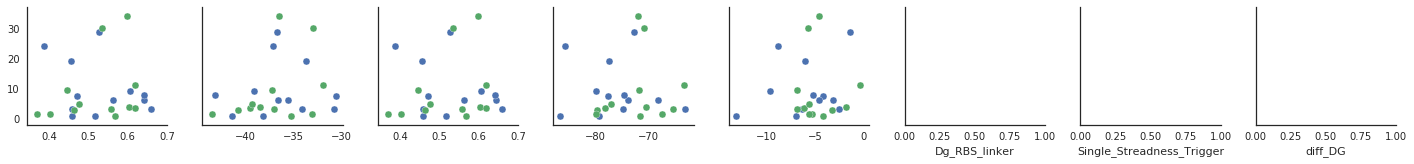

In [49]:
#correlation first analisis
import numpy as np
from scipy import stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")

plt.figure(figsize=(5,20))

def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    pos = (.1, .9) if kws['label'] == 'W' else (.1,.8)
    ax.annotate("r = {:.2f}".format(kws['label'],r),
                xy=pos, xycoords=ax.transAxes)
    



  
    
g = sns.pairplot(a, 
                 y_vars=["On/Off Rate"],
                 x_vars=["SS_Th_in_context","DeltaG_Switch","SS_Trigger_in_context","DeltaG_Complex","DeltaG_Trigger","Dg_RBS_linker","Single_Streadness_Trigger","diff_DG"],
                 hue="First_invading")
                
#g.map(corrfunc)
#plt.show()  
#g.map_diag(sns.distplot, kde=False)
#g.map_lower(sns.kdeplot, cmap="Blues_d")


plt.tight_layout()
plt.savefig("para_B.pdf",dpi=500)



In [ ]:
p9=pd.Series(two)
a["First2_invading"]=p9

In [46]:
import matplotlib.pyplot as plt

GAAUGACACAUGGAGGCUGAAGA
AGAAUGACACAUGGAGGCUGAAGA
AAGAAUGACACAUGGAGGCUGAAGA
GAAGAAUGACACAUGGAGGCUGAAGA
AGAAGAAUGACACAUGGAGGCUGAAGA
GAGAAGAAUGACACAUGGAGGCUGAAGA
UGAGAAGAAUGACACAUGGAGGCUGAAGA
GUGAGAAGAAUGACACAUGGAGGCUGAAGA
AGUGAGAAGAAUGACACAUGGAGGCUGAAGA
GAGUGAGAAGAAUGACACAUGGAGGCUGAAGA
AGAGUGAGAAGAAUGACACAUGGAGGCUGAAGA
GAGAGUGAGAAGAAUGACACAUGGAGGCUGAAGA
UGAGAGUGAGAAGAAUGACACAUGGAGGCUGAAGA
GAGAAAAGAAACAAGGGGAAUUU
AGAGAAAAGAAACAAGGGGAAUUU
AAGAGAAAAGAAACAAGGGGAAUUU
AAAGAGAAAAGAAACAAGGGGAAUUU
AAAAGAGAAAAGAAACAAGGGGAAUUU
AAAAAGAGAAAAGAAACAAGGGGAAUUU
GAAAAAGAGAAAAGAAACAAGGGGAAUUU
GGAAAAAGAGAAAAGAAACAAGGGGAAUUU
GGGAAAAAGAGAAAAGAAACAAGGGGAAUUU
UGGGAAAAAGAGAAAAGAAACAAGGGGAAUUU
AUGGGAAAAAGAGAAAAGAAACAAGGGGAAUUU
GAUGGGAAAAAGAGAAAAGAAACAAGGGGAAUUU
UGAUGGGAAAAAGAGAAAAGAAACAAGGGGAAUUU
AAACUGAUGAGAAUAGAGCGAAA
GAAACUGAUGAGAAUAGAGCGAAA
UGAAACUGAUGAGAAUAGAGCGAAA
AUGAAACUGAUGAGAAUAGAGCGAAA
CAUGAAACUGAUGAGAAUAGAGCGAAA
ACAUGAAACUGAUGAGAAUAGAGCGAAA
GACAUGAAACUGAUGAGAAUAGAGCGAAA
GGACAUGAAACUGAUGAGAAUAGAGCGAAA


AGCUUGAAAUUCGGUUUGAGGAAU
GAGCUUGAAAUUCGGUUUGAGGAAU
AGAGCUUGAAAUUCGGUUUGAGGAAU
AAGAGCUUGAAAUUCGGUUUGAGGAAU
GAAGAGCUUGAAAUUCGGUUUGAGGAAU
UGAAGAGCUUGAAAUUCGGUUUGAGGAAU
GUGAAGAGCUUGAAAUUCGGUUUGAGGAAU
AGUGAAGAGCUUGAAAUUCGGUUUGAGGAAU
CAGUGAAGAGCUUGAAAUUCGGUUUGAGGAAU
ACAGUGAAGAGCUUGAAAUUCGGUUUGAGGAAU
CACAGUGAAGAGCUUGAAAUUCGGUUUGAGGAAU
GCACAGUGAAGAGCUUGAAAUUCGGUUUGAGGAAU
GGAGAGAGGAGGGGGCAACCAUA
AGGAGAGAGGAGGGGGCAACCAUA
AAGGAGAGAGGAGGGGGCAACCAUA
GAAGGAGAGAGGAGGGGGCAACCAUA
GGAAGGAGAGAGGAGGGGGCAACCAUA
GGGAAGGAGAGAGGAGGGGGCAACCAUA
UGGGAAGGAGAGAGGAGGGGGCAACCAUA
AUGGGAAGGAGAGAGGAGGGGGCAACCAUA
AAUGGGAAGGAGAGAGGAGGGGGCAACCAUA
UAAUGGGAAGGAGAGAGGAGGGGGCAACCAUA
CUAAUGGGAAGGAGAGAGGAGGGGGCAACCAUA
UCUAAUGGGAAGGAGAGAGGAGGGGGCAACCAUA
AUCUAAUGGGAAGGAGAGAGGAGGGGGCAACCAUA
AUGCCCUCAGGUUCUUGAAUGAU
CAUGCCCUCAGGUUCUUGAAUGAU
ACAUGCCCUCAGGUUCUUGAAUGAU
CACAUGCCCUCAGGUUCUUGAAUGAU
GCACAUGCCCUCAGGUUCUUGAAUGAU
UGCACAUGCCCUCAGGUUCUUGAAUGAU
UUGCACAUGCCCUCAGGUUCUUGAAUGAU
UUUGCACAUGCCCUCAGGUUCUUGAAUGAU
GUUUGCACAUGCCCUCAGGUUCUU

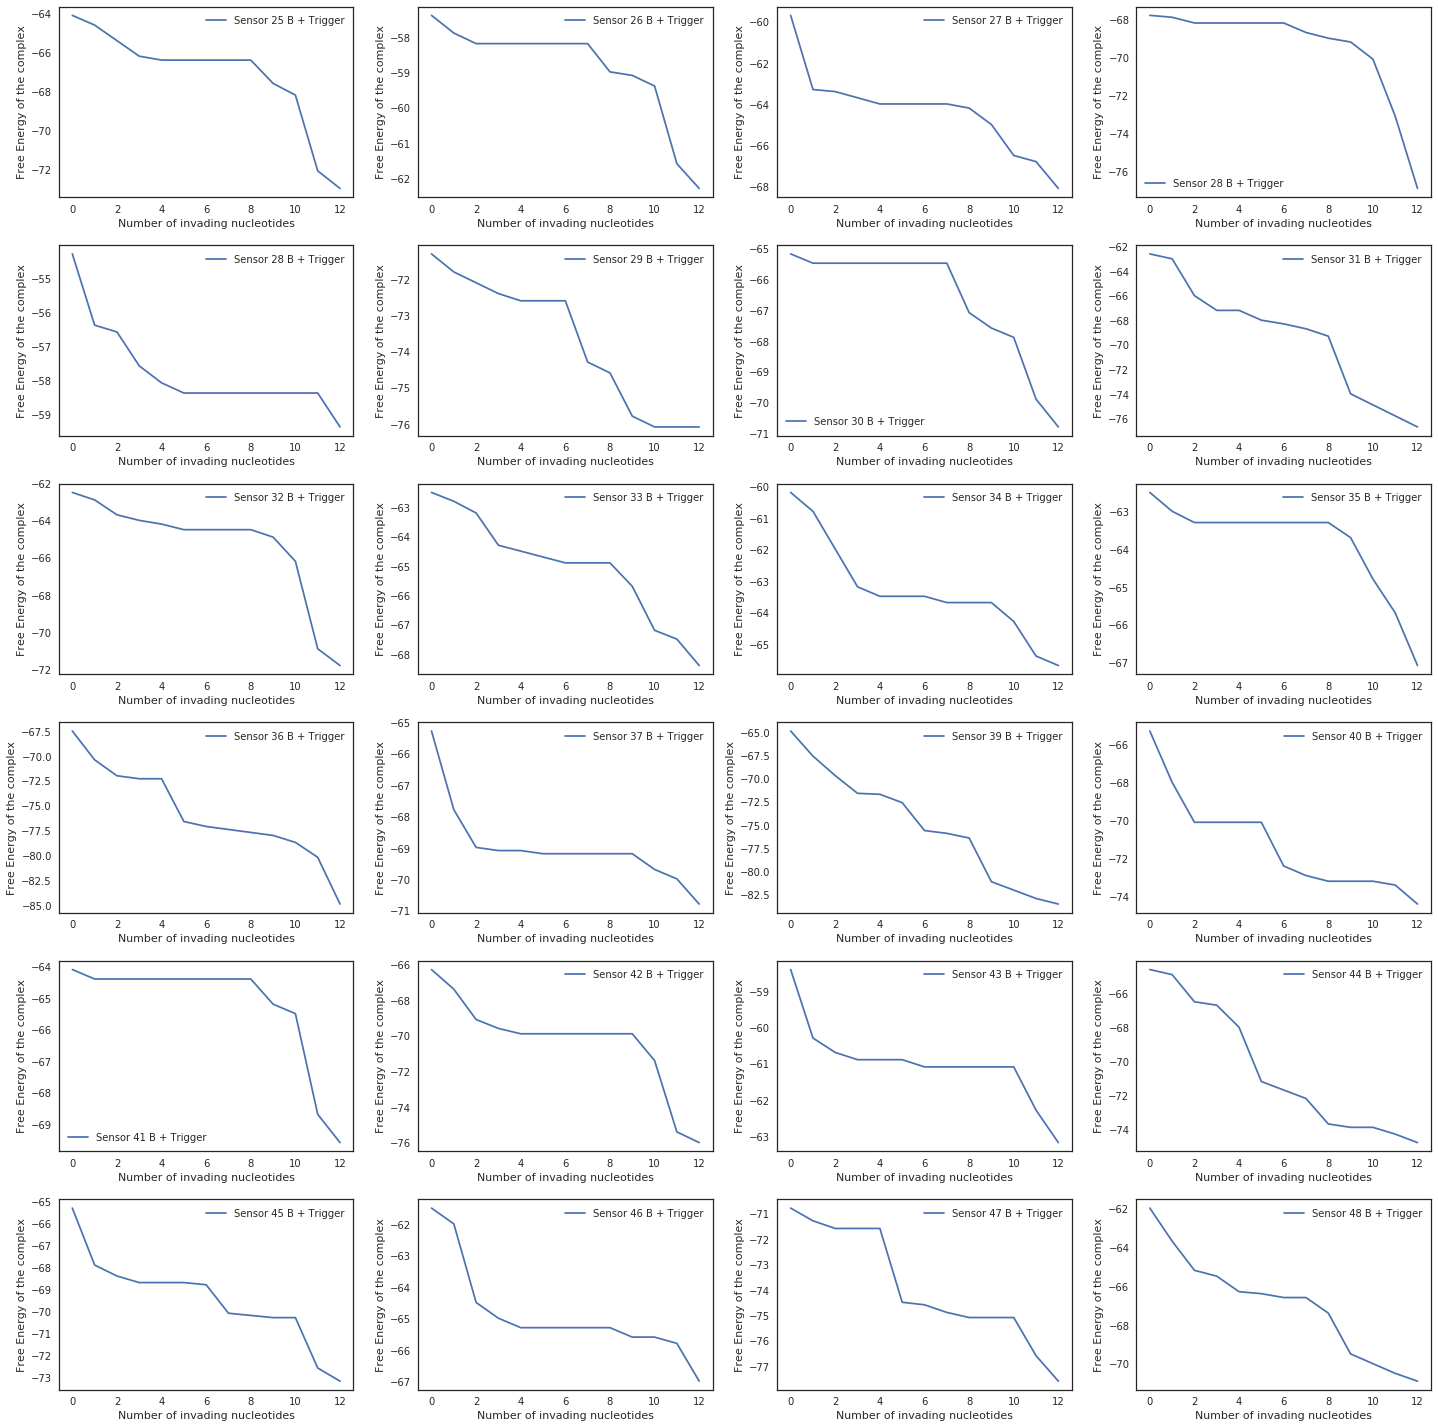

In [65]:

plt.figure(figsize=(20,20))
c=0
Dg_INv_f=[]
inviding_f=[]
for j in range(len(a.iloc[:,3])):
    Dg_INv=[]
    inviding=[]
    c=j+1
    ax=plt.subplot(6,4,c)
    
    for i in range(13):
        print(a.iloc[j,3][(13-i):])
        Dg_INv.append(DG_2(a.iloc[j,2],a.iloc[j,3][(13-i):],"",2))
        inviding.append(i)
    Dg_INv_f.append(Dg_INv)
    inviding_f.append(j)
    plt.xlabel("Number of invading nucleotides")
    plt.ylabel("Free Energy of the complex")

    plt.plot(inviding,Dg_INv,label="Sensor %s B + Trigger"  % str(a.Sensor[j]))
    plt.legend(loc=0)
#plt.show() 

plt.tight_layout()
plt.savefig("Serie_B.pdf",dpi=500)

In [52]:
diff_DG=[]
for i in range(len(a.iloc[:,3])):
    diff_DG.append(Dg_INv_f[i][0]-Dg_INv_f[i][-1])
P4=pd.Series(diff_DG)
a["diff_DG"]=P4.values 

In [58]:
range(24)

range(0, 24)

In [59]:
Dg_RBS_linker=[]
for i in range(len(a.iloc[:,3])):
    RBS_linker=a.iloc[i,2][48:96]
    Dg_RBS_linker.append(DG(RBS_linker,"",2))
P11=pd.Series(Dg_RBS_linker)

In [60]:
a["Dg_RBS_linker"]=P11.values

In [89]:
a

,Sensor,On/Off Rate,Sensor Sequence,Trigger Sequence,Amplification sequence,DeltaG_Switch,DeltaG_Trigger,Single_Streadness_Trigger,DeltaG_Complex,SS_Trigger_in_context,Dg_RBS_linker,diff_DG,First_invading
0,25,6.186667,UCUUCAGCCUCCAUGUGUCAUUCUUCUCACUCUCAAGGACUUUAGA...,UUGAGAGUGAGAAGAAUGACACAUGGAGGCUGAAGA,GGGCAGUGAUCUAGGCUACUGGAUUGAGAGUGAGAAGAAUGACACA...,-35.551,-3.175,0.820792,-73.881,0.642882,-8.469,8.9,S
1,26,11.093333,AAAUUCCCCUUGUUUCUUUUCUCUUUUUCCCAUCAUGGACUUUAGA...,AUGAUGGGAAAAAGAGAAAAGAAACAAGGGGAAUUU,GGGUGCCAGAGUUGUGUGUACAACAUGAUGGGAAAAAGAGAAAAGA...,-31.870,-0.396,0.890751,-63.281,0.618951,-7.898,4.9,S
2,27,34.133333,UUUCGCUCUAUUCUCAUCAGUUUCAUGUCCUGUGUCGGACUUUAGA...,GACACAGGACAUGAAACUGAUGAGAAUAGAGCGAAA,GGGCCAGCACAGUGGGAUGAUCGUUAAUGACACAGGACAUGAAACU...,-36.519,-4.615,0.773636,-71.981,0.597605,-9.988,8.4,S
3,28,7.360000,GCUCCCCUUCUACUGAUCUCCACAUGAUGUUUUCCAGGACUUUAGA...,UGGAAAACAUCAUGUGGAGAUCAGUAGAAGGGGAGC,GGGCGGGAUCUCCUCUGUUUCAAGAAUGGAAAACAUCAUGUGGAGA...,-30.502,-4.200,0.758035,-77.781,0.470759,-14.356,9.1,S
4,28,2.986667,AACUUCUUUAUUAUUUCCAUAGCCUCUUUUUUCCCCGGACUUUAGA...,GGGGAAAAAAGAGGCUAUGGAAAUAAUAAAGAAGUU,GGGCCAUCACUGGGUCUCAUCAAUAGAUGGGGUUCAGUGGGGAAAA...,-30.709,-2.603,0.833765,-63.181,0.659816,-7.706,5.1,S
5,29,2.666667,AGGGUGGCUUCGGCUCUUGGUGAAUUGGGCGUUAUCGGACUUUAGA...,GAUAACGCCCAAUUCACCAAGAGCCGAAGCCACCCU,GGGAAUGCUGUCAGUUCAUGGCUCCCAGCACAGUGGGAUGAUCGUU...,-40.821,-3.234,0.810051,-79.681,0.462997,-11.621,4.8,S
6,30,0.746667,CUUCCACUGCAGUCUUCCACUCUUUUUCCUCUUCAAGGACUUUAGA...,UUGAAGAGGAAAAAGAGUGGAAGACUGCAGUGGAAG,GGGAGAAGGAUGGUCUCUUCCUGGUUGUGGAAAGAGCUAGGCAAAC...,-35.203,-4.160,0.781046,-71.681,0.568331,-9.128,5.6,S
7,31,19.093333,CUGGGAUCAAGUACAUGUAGUGCGCCACGAGCAAAAGGACUUUAGA...,UUUUGCUCGUGGCGCACUACAUGUACUUGAUCCCAG,GGGCUGACCCUAAUAGUGGCCAUCAUUUUGCUCGUGGCGCACUACA...,-33.682,-6.100,0.673751,-77.581,0.456430,-13.048,14.1,S
8,32,28.800000,ACUAUUAGGGUCAGGGGUGUUAAUUGUGAGUAGCAAGGACUUUAGA...,UUGCUACUCACAAUUAACACCCCUGACCCUAAUAGU,GGGUUUGGUAUGGGCAAAGGGAUGCCAUUCUACGCAUGGGACUUUG...,-36.733,-1.457,0.819184,-72.681,0.527097,-12.105,9.3,S
9,33,3.626667,CAUCGCCAUUAAGGAGUAGUUGUUGUAUGAGGUGGUGGACUUUAGA...,ACCACCUCAUACAACAACUACUCCUUAAUGGCGAUG,GGGCCAUCUAUGCUGCCUUGACAACUUUCAUUACCCCAGCCGUCCA...,-38.465,-1.859,0.829996,-70.581,0.602435,-11.527,5.9,S


In [63]:
plt.gca?

In [64]:
a


,Sensor,On/Off Rate,Sensor Sequence,Trigger Sequence,Amplification sequence,DeltaG_Switch,DeltaG_Trigger,Single_Streadness_Trigger,DeltaG_Complex,SS_Trigger_in_context,Dg_RBS_linker,diff_DG
0,25,6.186667,UCUUCAGCCUCCAUGUGUCAUUCUUCUCACUCUCAAGGACUUUAGA...,UUGAGAGUGAGAAGAAUGACACAUGGAGGCUGAAGA,GGGCAGUGAUCUAGGCUACUGGAUUGAGAGUGAGAAGAAUGACACA...,-35.551,-3.175,0.820792,-73.881,0.642882,-8.469,8.9
1,26,11.093333,AAAUUCCCCUUGUUUCUUUUCUCUUUUUCCCAUCAUGGACUUUAGA...,AUGAUGGGAAAAAGAGAAAAGAAACAAGGGGAAUUU,GGGUGCCAGAGUUGUGUGUACAACAUGAUGGGAAAAAGAGAAAAGA...,-31.870,-0.396,0.890751,-63.281,0.618951,-7.898,4.9
2,27,34.133333,UUUCGCUCUAUUCUCAUCAGUUUCAUGUCCUGUGUCGGACUUUAGA...,GACACAGGACAUGAAACUGAUGAGAAUAGAGCGAAA,GGGCCAGCACAGUGGGAUGAUCGUUAAUGACACAGGACAUGAAACU...,-36.519,-4.615,0.773636,-71.981,0.597605,-9.988,8.4
3,28,7.360000,GCUCCCCUUCUACUGAUCUCCACAUGAUGUUUUCCAGGACUUUAGA...,UGGAAAACAUCAUGUGGAGAUCAGUAGAAGGGGAGC,GGGCGGGAUCUCCUCUGUUUCAAGAAUGGAAAACAUCAUGUGGAGA...,-30.502,-4.200,0.758035,-77.781,0.470759,-14.356,9.1
4,28,2.986667,AACUUCUUUAUUAUUUCCAUAGCCUCUUUUUUCCCCGGACUUUAGA...,GGGGAAAAAAGAGGCUAUGGAAAUAAUAAAGAAGUU,GGGCCAUCACUGGGUCUCAUCAAUAGAUGGGGUUCAGUGGGGAAAA...,-30.709,-2.603,0.833765,-63.181,0.659816,-7.706,5.1
5,29,2.666667,AGGGUGGCUUCGGCUCUUGGUGAAUUGGGCGUUAUCGGACUUUAGA...,GAUAACGCCCAAUUCACCAAGAGCCGAAGCCACCCU,GGGAAUGCUGUCAGUUCAUGGCUCCCAGCACAGUGGGAUGAUCGUU...,-40.821,-3.234,0.810051,-79.681,0.462997,-11.621,4.8
6,30,0.746667,CUUCCACUGCAGUCUUCCACUCUUUUUCCUCUUCAAGGACUUUAGA...,UUGAAGAGGAAAAAGAGUGGAAGACUGCAGUGGAAG,GGGAGAAGGAUGGUCUCUUCCUGGUUGUGGAAAGAGCUAGGCAAAC...,-35.203,-4.160,0.781046,-71.681,0.568331,-9.128,5.6
7,31,19.093333,CUGGGAUCAAGUACAUGUAGUGCGCCACGAGCAAAAGGACUUUAGA...,UUUUGCUCGUGGCGCACUACAUGUACUUGAUCCCAG,GGGCUGACCCUAAUAGUGGCCAUCAUUUUGCUCGUGGCGCACUACA...,-33.682,-6.100,0.673751,-77.581,0.456430,-13.048,14.1
8,32,28.800000,ACUAUUAGGGUCAGGGGUGUUAAUUGUGAGUAGCAAGGACUUUAGA...,UUGCUACUCACAAUUAACACCCCUGACCCUAAUAGU,GGGUUUGGUAUGGGCAAAGGGAUGCCAUUCUACGCAUGGGACUUUG...,-36.733,-1.457,0.819184,-72.681,0.527097,-12.105,9.3
9,33,3.626667,CAUCGCCAUUAAGGAGUAGUUGUUGUAUGAGGUGGUGGACUUUAGA...,ACCACCUCAUACAACAACUACUCCUUAAUGGCGAUG,GGGCCAUCUAUGCUGCCUUGACAACUUUCAUUACCCCAGCCGUCCA...,-38.465,-1.859,0.829996,-70.581,0.602435,-11.527,5.9
